# Clusterização Hierárquica Aglomerativa utilizando a medida de dissimilaridade Euclidiana

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import scipy.stats as stats

In [2]:
dataset = pd.read_csv('data/Credit Card Customer Data.csv')

In [3]:
dataset.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


**Variáveis do Dataset**

- Sl_No: Customer Serial Identification Number (é utilizado apenas como um índice)
- Customer Key: Chave do cliente(podemos utilizá-la como um id do cliente)
- Avg_Credit_Limit: Limite médio do cartão de crédito para o cliente
- Total_Credit_Cards: Quantidade total de cartões de crédito que o cliente possui
- Total_visits_bank: Número total de visitas ao banco (presencialmente)
- Total_visits_online: Número total de visitas ao banco de forma online
- Total_calls_made: Quantidade de ligações feitas ao banco

Removendo colunas não utilizadas e renomeando colunas

In [4]:
dataset = dataset.drop(columns=['Sl_No'])
dataset.rename(columns={'Customer Key': 'customer_key'}, inplace='True')

In [5]:
dataset.head()

,customer_key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,87073,100000,2,1,1,0
1,38414,50000,3,0,10,9
2,17341,50000,7,1,3,4
3,40496,30000,5,1,1,4
4,47437,100000,6,0,12,3


Criando um novo conjunto de dados apenas com as características das observações para servir de entrada para a clusterização

In [6]:
info_clientes = dataset.drop(columns=['customer_key'])

In [7]:
info_clientes.head()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3


Visualizando os tipos de dados e algumas estatísticas das características das observações

In [8]:
print(info_clientes.info(),'\n', info_clientes.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Avg_Credit_Limit     660 non-null    int64
 1   Total_Credit_Cards   660 non-null    int64
 2   Total_visits_bank    660 non-null    int64
 3   Total_visits_online  660 non-null    int64
 4   Total_calls_made     660 non-null    int64
dtypes: int64(5)
memory usage: 25.9 KB
None 
        Avg_Credit_Limit  Total_Credit_Cards  Total_visits_bank  \
count        660.000000          660.000000         660.000000   
mean       34574.242424            4.706061           2.403030   
std        37625.487804            2.167835           1.631813   
min         3000.000000            1.000000           0.000000   
25%        10000.000000            3.000000           1.000000   
50%        18000.000000            5.000000           2.000000   
75%        48000.000000            6.000000         

É possível observar que as variáveis são métricas, o que implica na escolha de uma medida de dissimilaridade para realizar o cálculo das distâncias.

As variáveis também possuem valores muito diferentes entre si. Uma boa prática para este caso é padronizar esses valores.

### Padronizando os valores utilizando z-score

In [9]:
for column in info_clientes.columns:
    info_clientes[column] = stats.zscore(info_clientes[column])

info_clientes.describe()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
count,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02,6.600000e+02
mean,8.612639e-17,4.306320e-17,-4.306320e-17,7.536059e-17,-8.612639e-17
std,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00,1.000758e+00
min,-8.398081e-01,-1.710864e+00,-1.473731e+00,-8.883795e-01,-1.251537e+00
25%,-6.536229e-01,-7.875852e-01,-8.604506e-01,-5.474897e-01,-9.022711e-01
50%,-4.408398e-01,1.356941e-01,-2.471705e-01,-2.065999e-01,-2.037386e-01
75%,3.570968e-01,5.973337e-01,9.793898e-01,4.751797e-01,4.947938e-01
max,4.399975e+00,2.443892e+00,1.592670e+00,4.224968e+00,2.241125e+00


### Iniciando o esquema de aglomeração hierárquico.

A medida de dissimilaridade escolhida é a Euclidiana e são testados diferentes tipos de métodos de encadeamento.

Gerando um dendrograma com o método de encadeamento Single Linkage

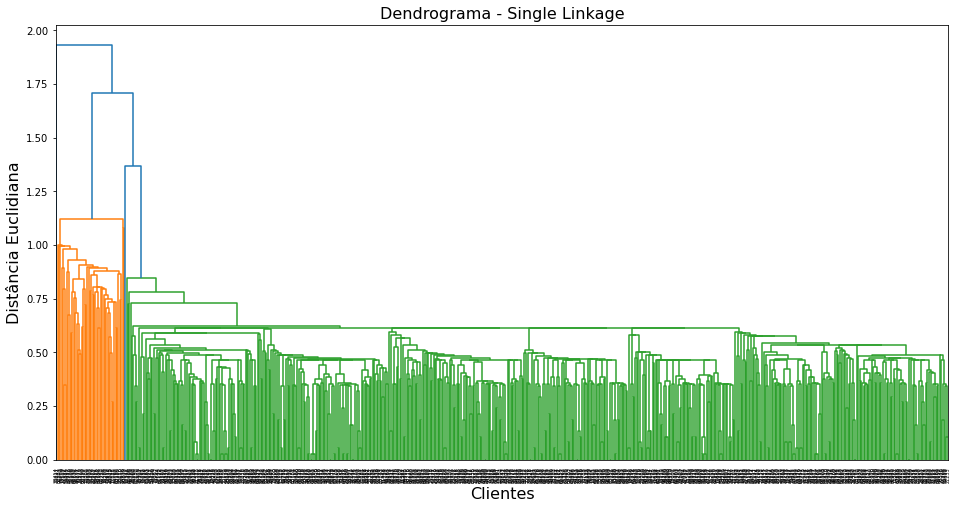

In [10]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(sch.linkage(info_clientes, method = 'single', metric = 'euclidean'), labels = list(dataset.customer_key))
plt.title('Dendrograma - Single Linkage', fontsize=16)
plt.xlabel('Clientes', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

Gerando um dendrograma com o método de encadeamento Complete Linkage

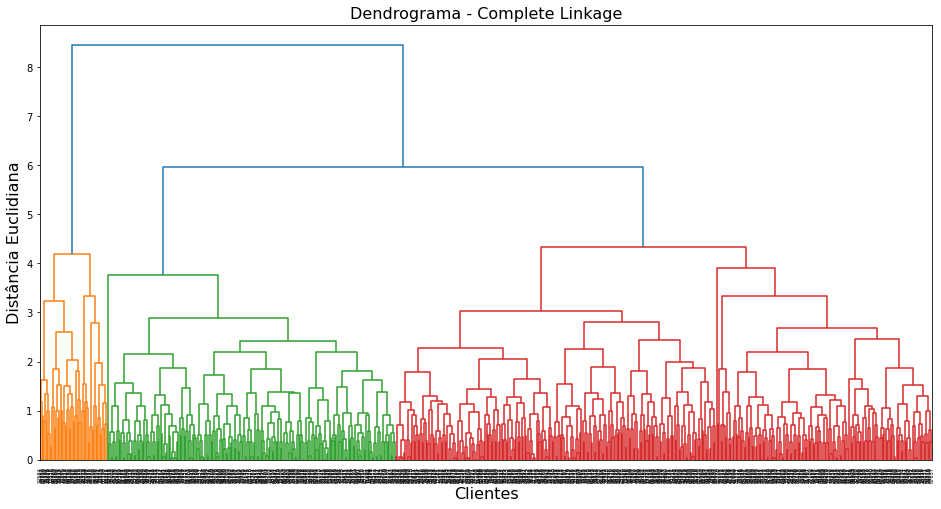

In [11]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(sch.linkage(info_clientes, method = 'complete', metric = 'euclidean'), labels = list(dataset.customer_key))
plt.title('Dendrograma - Complete Linkage', fontsize=16)
plt.xlabel('Clientes', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

Gerando um dendrograma com o método de encadeamento Average Linkage

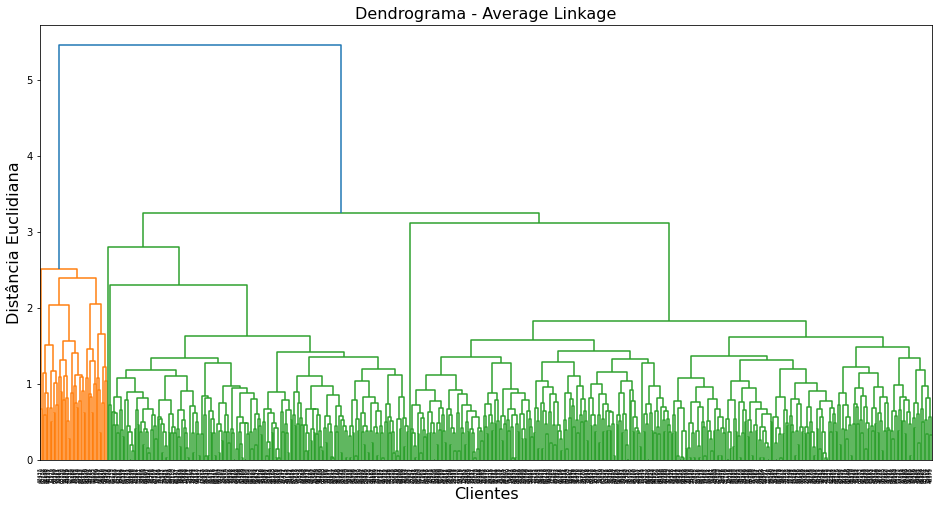

In [12]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(sch.linkage(info_clientes, method = 'average', metric = 'euclidean'), labels = list(dataset.customer_key))
plt.title('Dendrograma - Average Linkage', fontsize=16)
plt.xlabel('Clientes', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.show()

### Escolha do método de encadeamento, medida de dissimilaridade e número de clusters

A medida de dissimilaridade permanece sendo a Euclidiana, e o método de encadeamento escolhido é o Complete Linkage, porque utilizando esse método os clusters estão visualmente melhor distribuídos.

Foi escolhida uma altura para traçar uma reta que cortasse o ponto intermediário para um grade salto (que indica a junção de observações muito diferentes) e a quantidade de linhas verticais que essa reta corta indica a quantidade de clusters.

Neste caso, a quantidade de clustes coincidiu com a quantidade escolhida pelo algoritmo da função utilizada (scipy.cluster.hierarchy.linkage), mas a quantidade de clusters a ser escolhida também depende do seu cenário de negócio.

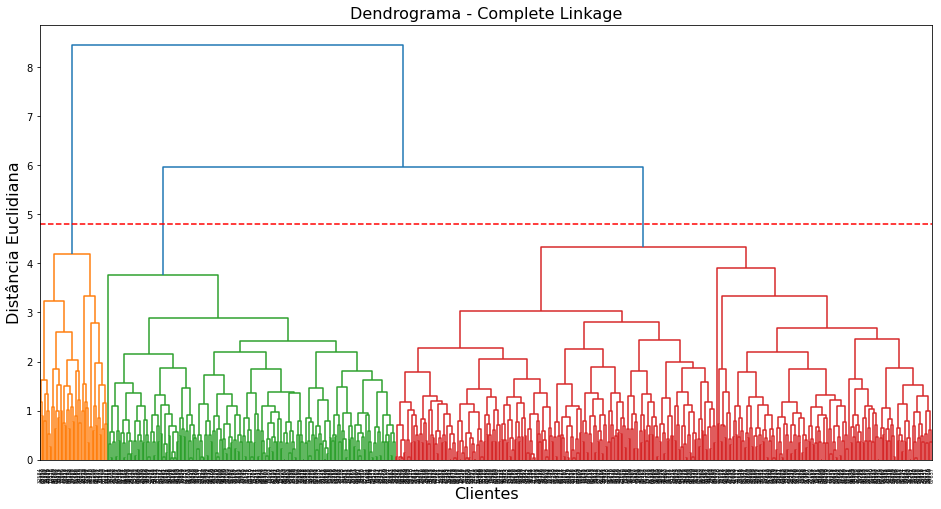

In [13]:
plt.figure(figsize=(16,8))

dendrogram = sch.dendrogram(sch.linkage(info_clientes, method = 'complete', metric = 'euclidean'), labels = list(dataset.customer_key))
plt.title('Dendrograma - Complete Linkage', fontsize=16)
plt.xlabel('Clientes', fontsize=16)
plt.ylabel('Distância Euclidiana', fontsize=16)
plt.axhline(y = 4.8, color = 'red', linestyle = '--') # define a altura em que quero 'cortar' o dendograma
plt.show()

Com medida de dissimilaridade, método de encadeamento e número de clusters definidos, cria-se uma variável do tipo lista que indica a qual cluster cada observação irá pertencer

In [14]:
cluster_compl= AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
cluster_compl_id = cluster_compl.fit_predict(info_clientes)
print(cluster_compl_id)

[0 2 0 0 1 2 1 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0
 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2
 2 2 2 0 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

Por fim, adiciona-se a variável que indica o cluster das respectivas observações ao dataset

In [15]:
dataset['cluster_complete'] = cluster_compl_id
dataset.head()

,customer_key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster_complete
0,87073,100000,2,1,1,0,0
1,38414,50000,3,0,10,9,2
2,17341,50000,7,1,3,4,0
3,40496,30000,5,1,1,4,0
4,47437,100000,6,0,12,3,1
